In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'  
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = '../data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## Do your thing crazy machine learning thing here :) ...

### Explore the data

In [38]:
from proj1_utils import *

In [41]:
cat_cols = [22]           # Only categorical variable
tX_num, tX_cat = split_numerical_categorical(tX,cat_cols)

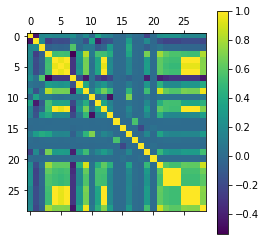

In [42]:
plt.matshow(np.corrcoef(tX_num,rowvar=False))
plt.colorbar()

In [43]:
np.corrcoef(tX_num[:,22:25],rowvar = False)

array([[1.        , 0.99610001, 0.9960998 ],
       [0.99610001, 1.        , 0.99999184],
       [0.9960998 , 0.99999184, 1.        ]])

In [44]:
np.corrcoef(tX_num[:,25:28],rowvar = False)

array([[1.        , 0.99935235, 0.99935185],
       [0.99935235, 1.        , 0.99999477],
       [0.99935185, 0.99999477, 1.        ]])

In [45]:
corr_cols = [4,6,25,26,23,24]
tX_num_uncorr = np.delete(tX_num,corr_cols,axis = 1)

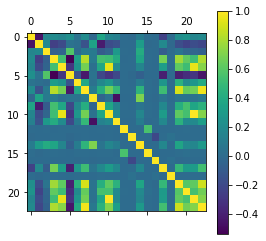

In [61]:
plt.matshow(np.corrcoef(tX_num_uncorr,rowvar=False))
plt.colorbar()

In [58]:
tX_test_num, tX_test_cat = split_numerical_categorical(tX_test,cat_cols)

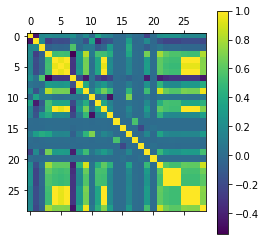

In [59]:
plt.matshow(np.corrcoef(tX_test_num,rowvar=False))
plt.colorbar()

In [60]:
tX_test_num_uncorr = np.delete(tX_test_num,corr_cols,axis = 1)

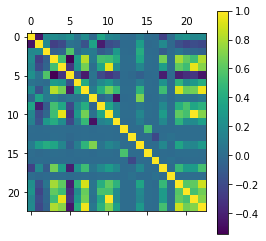

In [62]:
plt.matshow(np.corrcoef(tX_test_num_uncorr,rowvar=False))
plt.colorbar()

## Pre-processing

In [10]:
feature_cols = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']
dtypes = 15 * ["float"] + ['float-angle'] + 2 * ['float'] + ['float-angle'] \
         + ['float'] + ['float-angle'] +['float'] + ['categorical'] + (2 * ['float']\
         + ['float-angle']) * 2 + ['float']

In [13]:
# multiHistPlots(tX_std,feature_cols, (15,15))

In [14]:
# print(tX_std_ohe[:,[29,30,31]])

In [15]:
# data_prep_ohe.cols

In [16]:
# tX_std_float = np.delete(tX_std,idx_col_cat,axis = 1)

In [17]:
# sel_feature_cols = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
#        'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
#        'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
#        'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
#        'DER_lep_eta_centrality', 'PRI_jet_num']

In [18]:
# def getColsIdx(cols):
#     feature_cols = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
#        'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
#        'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
#        'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
#        'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
#        'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
#        'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
#        'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
#        'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']
#     col_idx = np.arange(0,30)
#     feature_col_idx_dict = dict(zip(feature_col,col_idx))
#     if (type(cols) == str):
#         return feature_col_idx_dict.get(cols) 
#     elif (type(cols) == list):
#         return [feature_col_idx_dict.get(c) for c in cols]
#     else:
#         raise TypeError("The argument should be a list or a string")

## Preprocessing

In [47]:
# Treat numerical values
full_x_train_num_nan = replace_undef_val_with_nan(tX_num_uncorr)
full_x_train_num_std, train_mean, train_std = nan_standardize_fit(full_x_train_num_nan)
# full_x_train_num_valid_std = replace_nan_val_with_mean(full_x_train_num_nan_std)
full_x_train_num_valid = replace_nan_val_with_median(full_x_train_num_std)
full_x_train_num_valid = replace_iqr_outliers(full_x_train_num_valid)
# Treat categorical values
full_x_train_ohe_cat = one_hot_encode(tX_cat)
full_x_train = np.hstack((add_bias(full_x_train_num_valid_std),full_x_train_ohe_cat))
# Treat labels
full_y_train = y
# full_y_train = relabel_y_non_negative(y).reshape(-1,1)

In [48]:
x_train, y_train, x_val, y_val = split_data(full_x_train,full_y_train,0.8)

In [49]:
# Check final shape
x_train.shape

(200000, 27)

In [31]:
x_test_num, x_test_cat = split_numerical_categorical(tX_test,cat_cols)
# Treat numerical values
x_test_num_nan = replace_undef_val_with_nan(x_test_num)
x_test_num_nan_std = nan_standardize_transform(x_test_num_nan,train_mean,train_std)
# x_test_num_nan_std = nan_standardize_with_median_transform(x_test_num_nan,train_median,train_std)
x_test_num_valid_std = replace_nan_val_with_median(x_test_num_nan_std)
x_test_num_valid_std = replace_iqr_outliers(x_test_num_valid_std)
# x_test_num_valid_std = replace_nan_val_with_mean(x_test_num_nan_std)
x_test_ohe_cat = one_hot_encode(x_test_cat)
x_test = np.hstack((add_bias(x_test_num_valid_std),x_test_ohe_cat))
# Treat labels
y_test = relabel_y_non_negative(y_test).reshape(-1,1)

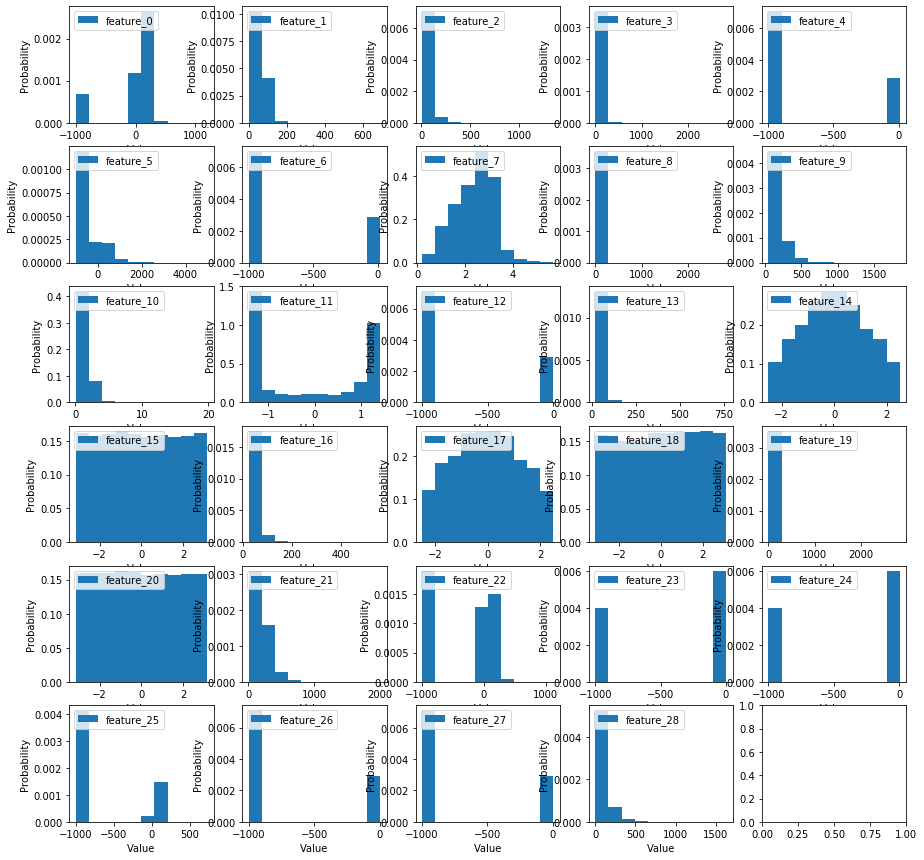

In [32]:
multiHistPlots(full_x_train_num)

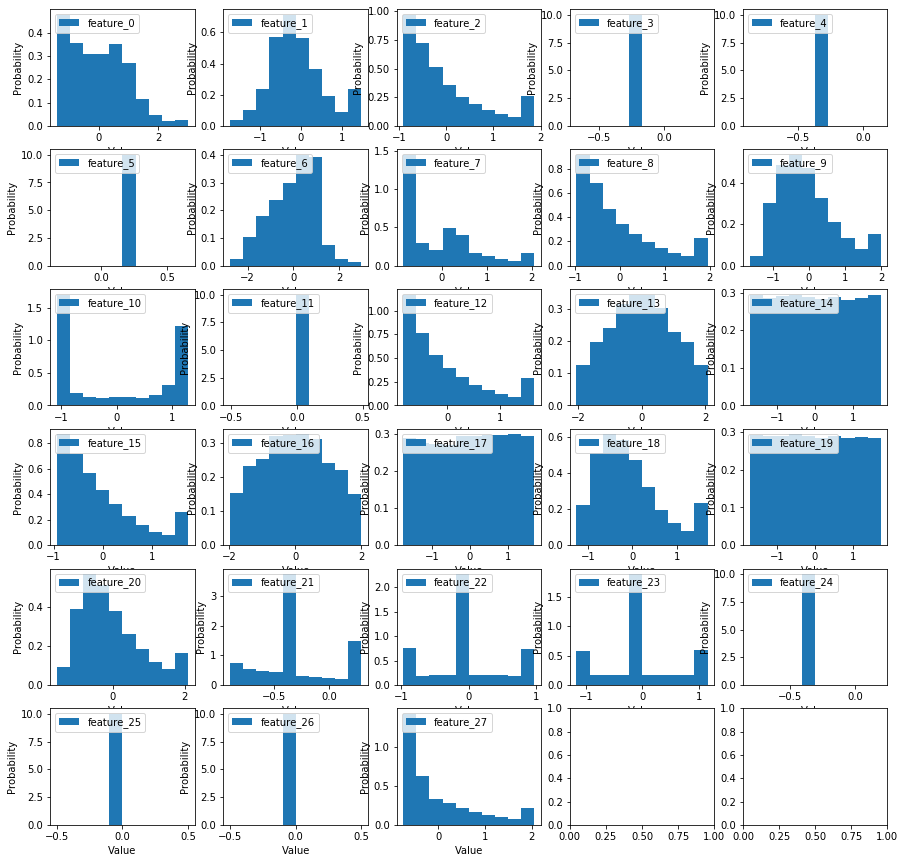

In [36]:
x_train_num, x_train_cat = split_numerical_categorical(x_train,[30,31,32])
multiHistPlots(x_train_num[:,2:])

## Explore feature 12: Det_met_phi_centrality

## Import models

In [50]:
from implementations import *

## Ridge regression

In [38]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    ext_x_train = build_poly(x_train,degree)
    ext_x_test = build_poly(x_test,degree)
    
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)
    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w_star = ridge_regression(y_train,ext_x_train,lambda_)
        rmse_tr.append(np.sqrt(2*compute_mse(y_train,ext_x_train,w_star)))
        rmse_te.append(np.sqrt(2*compute_mse(y_test,ext_x_test,w_star)))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

In [51]:
lambda_ = 0.3
# x_train = np.hstack((np.ones((tX.shape[0],1)),tX))
# x_test = np.hstack((np.ones((tX_test.shape[0],1)),tX_test))
weights = ridge_regression(y_train,x_train,lambda_)
# weights = ridge_regression(y.reshape(-1,1),x_train,lambda_)

## Least squares

In [40]:
# weights = least_squares(y_train,x_train)

## Generate predictions and save ouput in csv format for submission:

In [52]:
y_pred = predict_labels(weights, x_val)
y_val = relabel_y_negative(y_val)

In [55]:
# Just to check
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
print(confusion_matrix(y_val,y_pred))
print(accuracy_score(y_val,y_pred))
print(f1_score(y_val,y_pred))
print(recall_score(y_val,y_pred))
print(precision_score(y_val,y_pred))

[[28069  4701]
 [ 8913  8317]]
0.72772
0.5499206559111346
0.48270458502611724
0.6388846212935935


In [57]:
OUTPUT_PATH = '../output_submission/submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, x_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'x_test' is not defined